In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as sch
import seaborn as sns
sns.set()


# path_to_data = '/home/ruairi/data/tmp/baseline_stats_pre_exclusion.csv'

path_to_data = '/home/ruairi/data/tmp/pre_exclusion_extra_features.csv'
df = pd.read_csv(path_to_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 7 columns):
mfr             771 non-null float64
cv isi          771 non-null float64
recording_id    771 non-null int64
neuron_id       771 non-null int64
var             771 non-null float64
isi_var         771 non-null float64
minute_gap      771 non-null int64
dtypes: float64(4), int64(3)
memory usage: 42.2 KB


In [ ]:
def exclude_recordings(df, groups):
    pass

In [2]:
df.head()

,mfr,cv isi,recording_id,neuron_id,var,isi_var,minute_gap
0,5.928903,0.239206,1,1,0.172195,1.999181e+06,0
1,1.206947,0.787332,1,2,1.174466,3.233078e+11,1
2,6.598349,0.299881,1,3,0.244312,2.065885e+06,0
3,10.164469,0.332762,1,4,9.095547,5.526932e+06,0
4,8.665576,0.745341,1,5,8.107467,1.013471e+07,0


In [97]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

X = df[['mfr', 'cv isi', 'isi_var']].dropna().values
scaler = StandardScaler()
X = scaler.fit_transform(X)

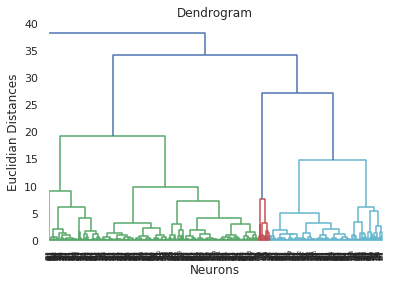

In [99]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidian Distances')
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 6, 
                             affinity = 'euclidean',
                            linkage = 'ward')
y_hc = hc.fit_predict(X)
df['cluster'] = y_hc

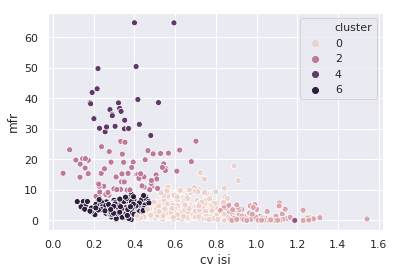

In [101]:
sns.scatterplot(x=df['cv isi'], y=df['mfr'], hue=df['cluster'])

plt.show()

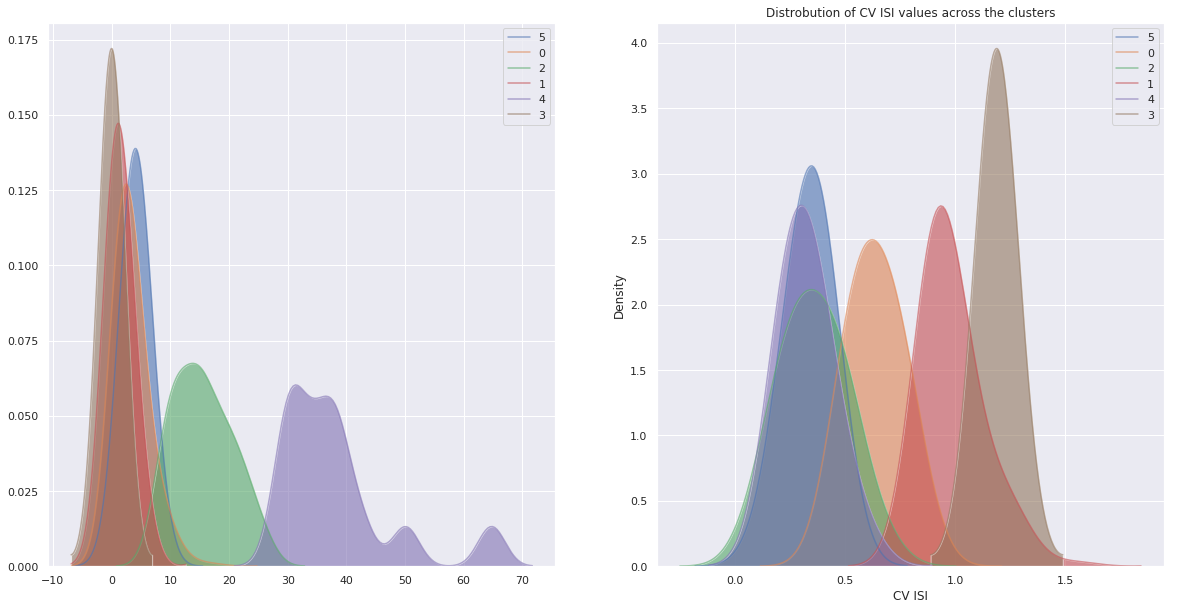

In [102]:
import warnings
warnings.filterwarnings('ignore')

f, a = plt.subplots(ncols=2, figsize=(20, 10))

for group in df['cluster'].unique():
    sns.kdeplot(ax=a[0],  bw=2.3, data=df[df['cluster']==group]['mfr'], shade=True, alpha=0.6, label=group)
    
plt.title('Distrobution of firing rates across the clusters')
plt.xlabel('Firing rate [Hz]')
plt.ylabel('Density')

for group in df['cluster'].unique():
    sns.kdeplot(ax=a[1], bw=0.1, data=df[df['cluster']==group]['cv isi'], shade=True, alpha=0.6, label=group)
    
plt.title('Distrobution of CV ISI values across the clusters')
plt.xlabel('CV ISI')
plt.ylabel('Density')

plt.show()

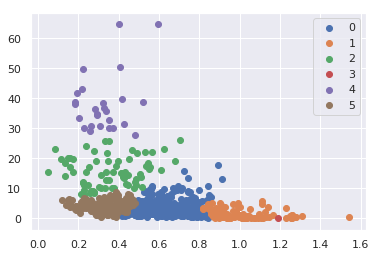

In [103]:
g = df.groupby('cluster')

for name, gr in g:
    plt.scatter(gr['cv isi'], gr['mfr'], label=name)
    
plt.legend()
plt.show()

In [53]:
d = {'0':'Very Fast Spiking',
    '1': 'Clocklike',
    '2': 'Fast Regular Spiking',
    '3': 'Very Irregular',
    '4': 'Slow Spiking',
    '5': 'Fast Irregular'}

df['cluster'] = df['cluster'].astype(str).map(d)

In [104]:
df.to_csv('/home/ruairi/data/tmp/crazy.csv', index=False)